In [1]:
# 1) import sqlite and pandas and visualization moduls

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import df from csv
df1 = pd.read_csv('Survey_Data_Demographics.csv')
df2 = pd.read_csv('Survey_Data_Technologies.csv')

# create a connection to a SQLite database in temporary memory in RAM
conn = sqlite3.connect(':memory:')

# pass the DataFrame data to the database as a SQL table
df1.to_sql('Survey_Data_Demographics', conn, index=False, if_exists='replace')
df2.to_sql('Survey_Data_Technologies', conn, index=False, if_exists='replace')

74589

In [2]:
# 2) print the tables present in db 

query= """ 
select name as table_name
from 
sqlite_master
where type = 'table'
"""

# insert dataframe into a variable
df_tables = pd.read_sql_query(query,conn)
df_tables

,table_name
0,Survey_Data_Demographics
1,Survey_Data_Technologies


In [4]:
# 3) print the number of rows are there in the table 'Survey_Data_Demographics'

query1 = """
select count(*) as CountRows
from Survey_Data_Demographics
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
print("The number of rows of 'Survey_Data_Demographics' is:", pd.read_sql_query(query1, conn).iloc[0,0])

# print the number of rows are there in the table 'Survey_Data_Technologies' 
query2 = """
select count(*) as CountRows
from Survey_Data_Technologies
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
print("The number of rows of 'Survey_Data_Technologies' is:", pd.read_sql_query(query2, conn).iloc[0,0])

The number of rows of 'Survey_Data_Demographics' is: 11398
The number of rows of 'Survey_Data_Technologies' is: 74589


In [5]:
# 4) show the tables 

query1 = """
select
*
from
Survey_Data_Demographics
"""
query2 = """
select
*
from
Survey_Data_Technologies
"""
# insert dataframe into a variable
df_demographics = pd.read_sql_query(query1, conn)
df_technologies = pd.read_sql_query(query2, conn)

# Modify the number of visible columns in the display
pd.options.display.max_columns = 100

# show the datasets
display(df_demographics.head())
display(df_technologies.head())

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase,NormalizedAnnualCompensation
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,100 to 499 employees,"Developer, full-stack",3,16,Less than 1 year,Very satisfied,Slightly satisfied,Very confident,No,Not sure,I am not interested in new job opportunities,Less than a year ago,"Write code by hand (e.g., on a whiteboard);Int...",No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,USD,United States dollar,61000,Yearly,61000,80,There's no schedule or spec; I work on what se...,None,Less than once per month / Never,Home,A little below average,No,4,"No, but I think we should",Developers typically have the most influence o...,I have little or no influence,Yes,SIGH,Yes,Reddit,In real life (in person),Username,2014,Daily or almost daily,Find answers to specific questions;Pass the ti...,1-2 times per week,Stack Overflow was much faster,31-60 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy,61000
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,10 to 19 employees,"Database administrator;Developer, back-end;Dev...",12,11,4,Slightly satisfied,Slightly satisfied,Somewhat confident,No,Not sure,"I’m not actively looking, but I am open to new...",Less than a year ago,Write any code;Interview with people in peer r...,Yes,Financial performance or funding status of the...,I was preparing for a job search,NZD,New Zealand dollar,138000,Yearly,95179,32,There is a schedule and/or spec (made by me or...,Being tasked with non-development work;Inadequ...,Less than once per month / Never,Office,A little above average,"Yes, because I see value in code review",12,"Yes, it's not part of our process but the deve...",Not sure,I have some influence,No,SIGH,Yes,Twitter,In real life (in person),Username,2013,Daily or almost daily,Find answers to specific questions;Contribute ...,3-5 times per week,They were about the same,None,Yes,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,None,23,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult,138000
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,10 to 19 employees,Data or business analyst;Database administrato...,17,11,8,Ver

,Respondent,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,DevEnviron
0,4,C,C,MySQL,MySQL,Linux,Linux,None,None,Eclipse
1,4,C++,C#,SQLite,SQLite,Windows,Windows,None,None,Vim
2,4,C#,JavaScript,None,None,None,None,None,None,Visual Studio
3,4,Python,SQL,None,None,None,None,None,None,Visual Studio Code
4,4,SQL,None,None,None,None,None,None,None,None


In [6]:
# 5) describe the tables

query1 = '''
pragma table_info('Survey_Data_Demographics')
'''
query2 = '''
pragma table_info('Survey_Data_Technologies')
'''

# insert dataframe into a variable
display(pd.read_sql_query(query1, conn))
display(pd.read_sql_query(query2, conn))

# change rows' number visibility in display
pd.options.display.max_rows = 100

,cid,name,type,notnull,dflt_value,pk
0,0,Respondent,INTEGER,0,None,0
1,1,MainBranch,TEXT,0,None,0
2,2,Hobbyist,TEXT,0,None,0
3,3,OpenSourcer,TEXT,0,None,0
4,4,OpenSource,TEXT,0,None,0
...,...,...,...,...,...,...
66,66,Ethnicity,TEXT,0,None,0
67,67,Dependents,TEXT,0,None,0
68,68,SurveyLength,TEXT,0,None,0
69,69,SurveyEase,TEXT,0,None,0


,cid,name,type,notnull,dflt_value,pk
0,0,Respondent,INTEGER,0,None,0
1,1,LanguageWorkedWith,TEXT,0,None,0
2,2,LanguageDesireNextYear,TEXT,0,None,0
3,3,DatabaseWorkedWith,TEXT,0,None,0
4,4,DatabaseDesireNextYear,TEXT,0,None,0
5,5,PlatformWorkedWith,TEXT,0,None,0
6,6,PlatformDesireNextYear,TEXT,0,None,0
7,7,WebFrameWorkedWith,TEXT,0,None,0
8,8,WebFrameDesireNextYear,TEXT,0,None,0
9,9,DevEnviron,TEXT,0,None,0


In [7]:
# 6) create a grouping on a column of your choice

# Age column
query1 = """
select
Age,
count(*) as CountAge
from
Survey_Data_Demographics
group by age
order by age
"""
# insert dataframe into a variable
pd.read_sql_query(query1, conn)

,Age,CountAge
0,16,3
1,17,6
2,18,29
3,19,78
4,20,109
5,21,203
6,22,406
7,23,581
8,24,679
9,25,738


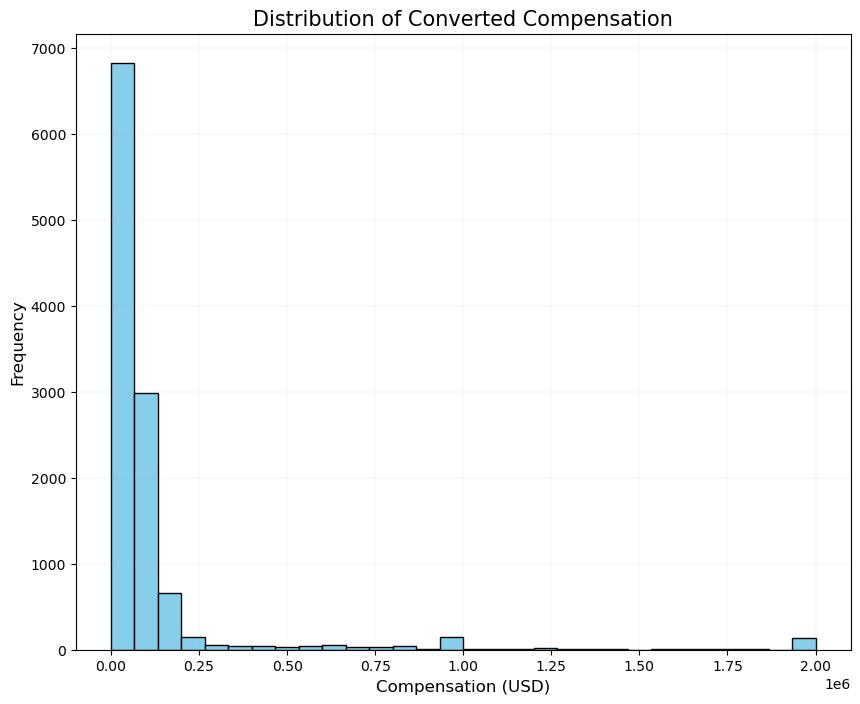

In [8]:
# 7) Plot a histogram of ConvertedComp column

query1 = '''
select 
ConvertedComp
from
Survey_Data_Demographics'''

# insert dataframe into a variable
df_ConvertedComp = pd.read_sql_query(query1,conn)

# create a figure
plt.figure(figsize = (10,8))

# type of the graph
plt.hist(df_ConvertedComp, bins = 30, color = 'skyblue', edgecolor = 'black', alpha = 1)

# grid
plt.grid(linestyle = '-', linewidth = 0.1)

# labels and title
plt.title("Distribution of Converted Compensation", fontsize = 15)
plt.xlabel("Compensation (USD)", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)

# show the chart
plt.show()

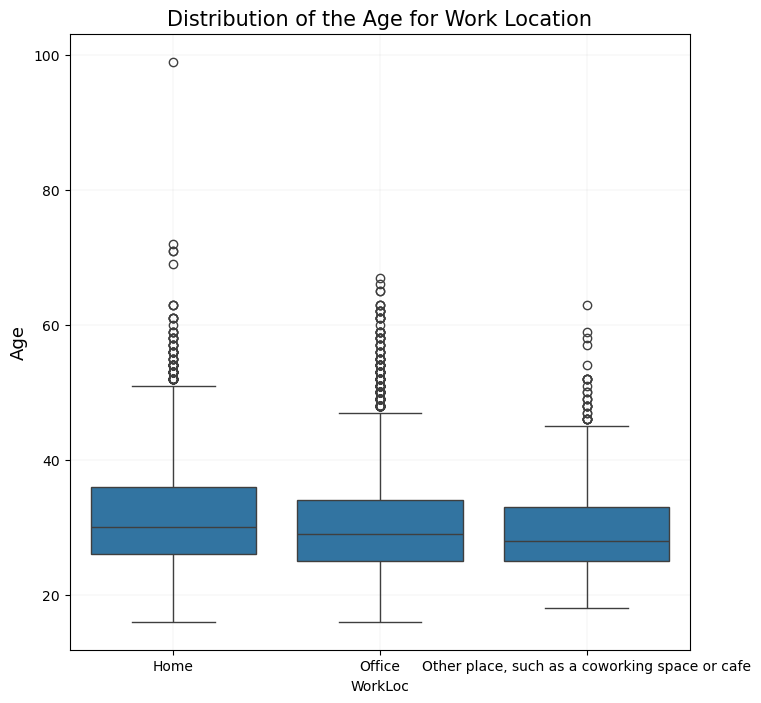

In [24]:
# 8) Plot a box plot of Age

query1 = """
select
Age,
WorkLoc
from
Survey_Data_Demographics"""

# insert dataframe into a variable
df_Age_WorkLoc = pd.read_sql_query(query1,conn)

# create a figure
plt.figure(figsize = (8,8))

# type of the graph
sns.boxplot(data = df_Age_WorkLoc, y = 'Age', x = 'WorkLoc')

# grid
plt.grid(linestyle = '-', linewidth = 0.1)

# labels and title
plt.title("Distribution of the Age for Work Location", fontsize = 15)
plt.ylabel("Age", fontsize = 13)

# show the chart
plt.show()

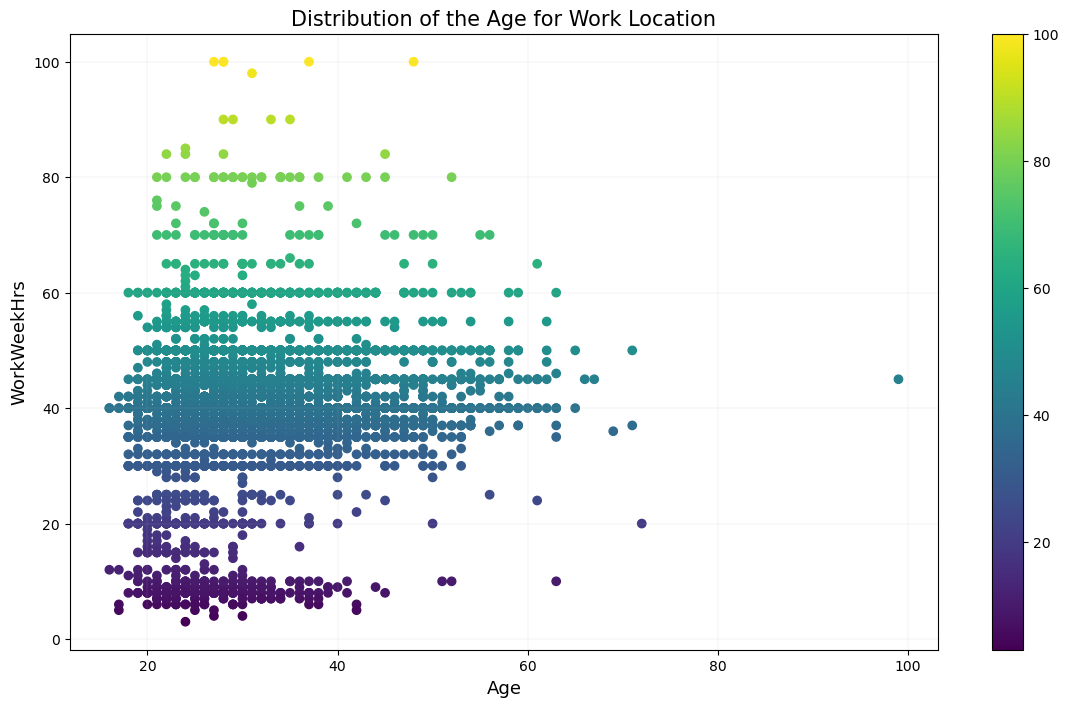

Correlation between age and weekly working hours: 0.11996610116450401 
there is a weak correlation


In [9]:
# 9) Create a scatter plot of Age and WorkWeekHrs

query1 = """
select
Age,
WorkWeekHrs
from
Survey_Data_Demographics
where WorkWeekHrs <= 100 """

# insert dataframe into a variable
df_Age_WorkWeekHrs = pd.read_sql_query(query1, conn)

# create a figure
plt.figure(figsize = (14,8))

# type of the graph
plt.scatter(x = df_Age_WorkWeekHrs['Age'], y = df_Age_WorkWeekHrs['WorkWeekHrs'], c = df_Age_WorkWeekHrs['WorkWeekHrs'])

# color map
plt.colorbar()

# grid
plt.grid(linestyle = '-', linewidth = 0.1)

# labels and title
plt.title("Distribution of the Age for Work Location", fontsize = 15)
plt.xlabel("Age", fontsize = 13)
plt.ylabel("WorkWeekHrs", fontsize = 13)

# show the chart
plt.show()

# is there a correlation between the two variables?
correlation = df_Age_WorkWeekHrs['Age'].corr(df_Age_WorkWeekHrs['WorkWeekHrs'])
print("Correlation between age and weekly working hours:", correlation, "\nthere is a weak correlation" )

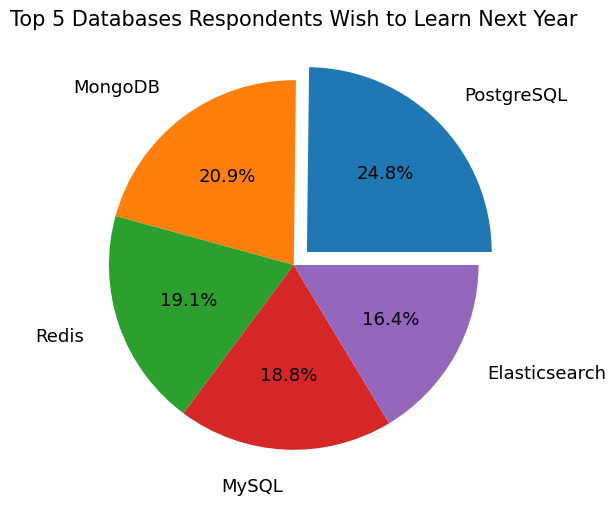

In [10]:
# 10) Create a pie chart of the top 5 databases that respondents wish to learn next year
    # Label the pie chart with database names
    # Display percentages of each database on the pie chart

query2 = """
select
*
from
Survey_Data_Technologies"""

# insert dataframe into a variable
df_DatabaseDesireNextYear = pd.read_sql_query(query2,conn)

# insert top 5 databases into a variable
top_5_databases = df_DatabaseDesireNextYear['DatabaseDesireNextYear'].value_counts().head(5)

# create a figure
plt.figure(figsize = (6,6))

# type of the graph
wedges = [0.1,0.0,0.0,0.0,0.0]
plt.pie(top_5_databases,
        autopct= '%1.1f%%',
        labels = top_5_databases.index,
        labeldistance = 1.2,
        explode = wedges,
        shadow = False,
        textprops={'fontsize': 13, 'color': 'black'})

# labels and title
plt.title("Top 5 Databases Respondents Wish to Learn Next Year", fontsize = 15)

# show the chart
plt.show()

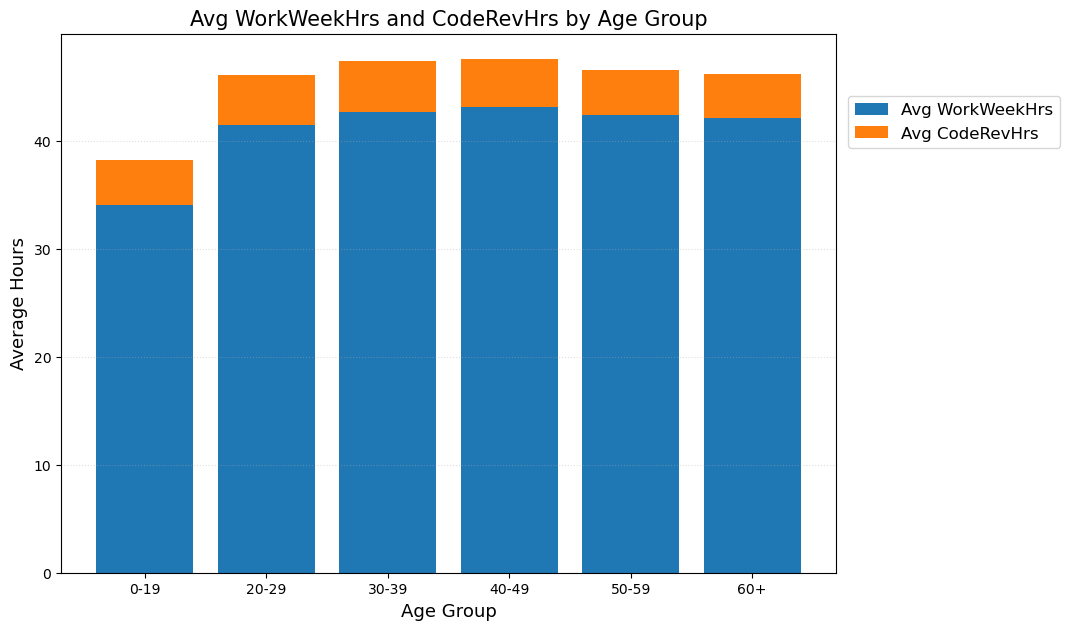

In [11]:
# 11) Create a stacked chart of mean WorkWeekHrs and CodeRevHrs for the age group at your choise

# *** BONUS: Create an advanced query...

query1 = """
select
case
     when Age between 0 and 19 then "0-19"
     when Age between 20 and 29 then "20-29"
     when Age between 30 and 39 then "30-39"
     when Age between 40 and 49 then "40-49"
     when Age between 50 and 59 then "50-59"
     when Age >= 60 then "60+"
     end as AgeGroup,    
avg(WorkWeekHrs) as AvgWorkWeekHrs,
avg(CodeRevHrs) as AvgCodeRevHrs
from
Survey_Data_Demographics
where Age is not null
group by AgeGroup
"""

# insert dataframe into a variable
df_AgeGroup = pd.read_sql_query(query1,conn)

# create chart properties
x = df_AgeGroup['AgeGroup']  # age groups
y1 = df_AgeGroup['AvgWorkWeekHrs']  # average hours worked
y2 = df_AgeGroup['AvgCodeRevHrs']   # average code review hours

# Create the chart
plt.figure(figsize=(10, 7))
plt.bar(x, y1, label = 'Avg WorkWeekHrs')
plt.bar(x, y2, bottom = y1, label = 'Avg CodeRevHrs')

# add title, lables and legend
plt.title("Avg WorkWeekHrs and CodeRevHrs by Age Group", fontsize = 15)
plt.xlabel("Age Group", fontsize = 13)
plt.ylabel("Average Hours", fontsize = 13)
plt.legend(bbox_to_anchor = (1.3,0.9), frameon = True,  fontsize = 12)

# add grid
plt.grid(axis = 'y', linestyle = ':', alpha = 0.4)

# show the graph
plt.show()

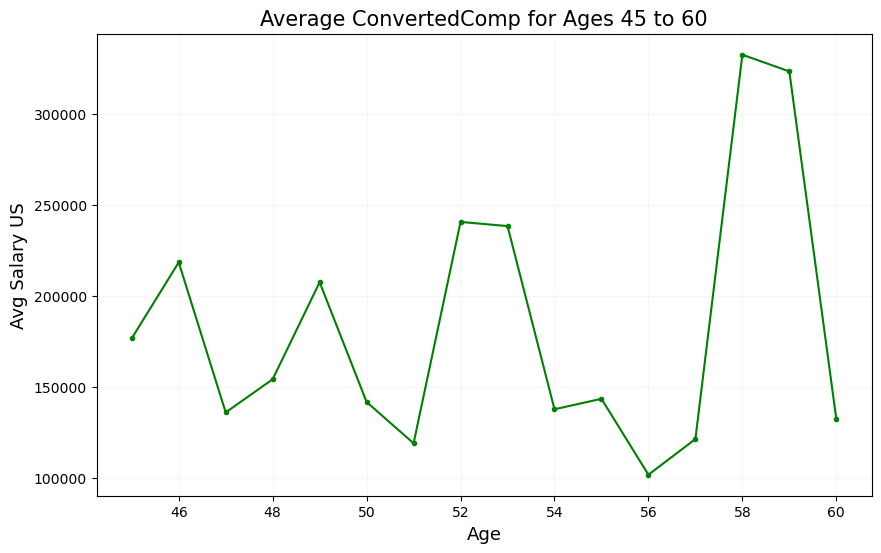

In [12]:
# 12) Plot the mean ConvertedComp for all ages from 45 to 60

query1 = """
select
Age,
avg(ConvertedComp) as AvgConvertedComp
from
Survey_Data_Demographics
where Age between 45 and 60
group by Age
"""

# insert dataframe into a variable
df_AvgConvertedComp = pd.read_sql_query(query1,conn)

# Create the chart
plt.figure(figsize = (10,6))
plt.plot(df_AvgConvertedComp['Age'], df_AvgConvertedComp['AvgConvertedComp'],  marker = '.', c = 'green')

# add title, lables and legend
plt.title('Average ConvertedComp for Ages 45 to 60', fontsize = 15)
plt.xlabel('Age', fontsize = 13)
plt.ylabel('Avg Salary US', fontsize = 13)

# add grid
plt.grid(linestyle = '-', alpha = 0.1)

# show the graph
plt.show()

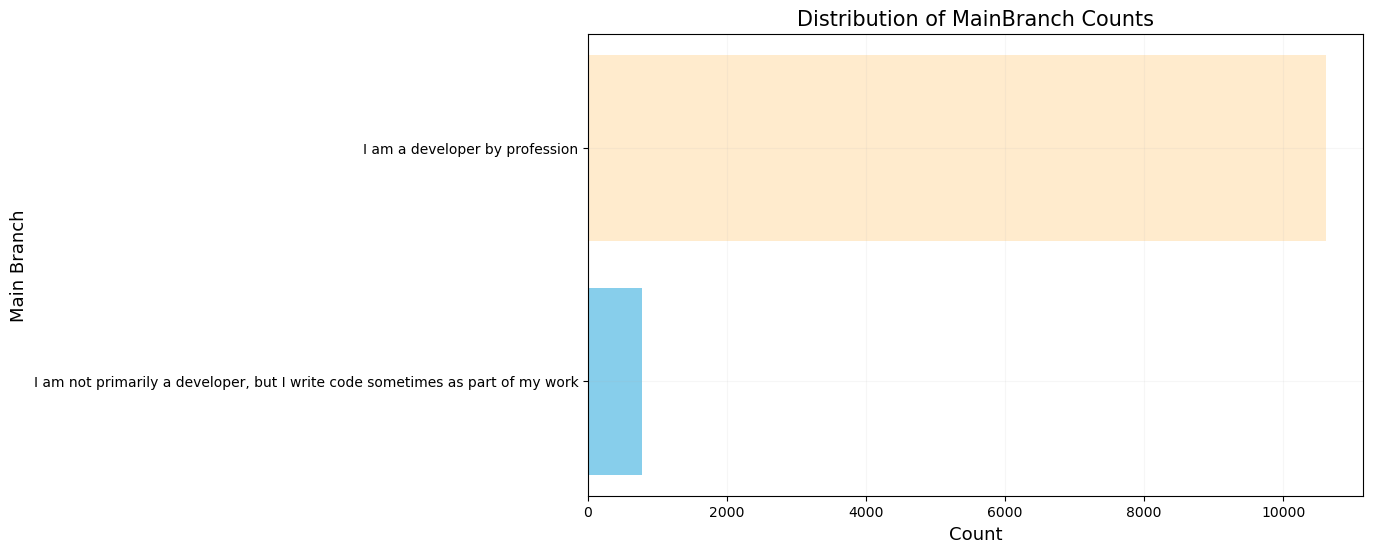

In [13]:
# 13) Create a horizontal bar chart using column MainBranch

query1 = """
select
MainBranch,
count(*) as Count
from
Survey_Data_Demographics
group by MainBranch
"""

# insert dataframe into a variable
df_MainBranch = pd.read_sql_query(query1, conn).sort_values(by = 'Count', ascending = True)

# Create the chart
plt.figure(figsize = (10,6))
plt.barh(df_MainBranch['MainBranch'], df_MainBranch['Count'], color = ['skyblue','#FFEBCD'])

# add title, lables
plt.title('Distribution of MainBranch Counts', fontsize = 15)
plt.xlabel('Count', fontsize = 13)
plt.ylabel('Main Branch', fontsize = 13)

# add grid
plt.grid(linestyle = '-', alpha = 0.1)

# show the graph
plt.show()

In [14]:
# 14) Close the databases connections

conn.close()